In [1]:
import pandas as pd

# Data Preprocessing

## Data Scraping

### IMDB 2000-2024 movies

Original scraped data

In [62]:
data = pd.read_csv(r'C:\Users\Thibaut\Documents\SIMPLON\DEV-IA\BOXOFFICE\scraping\data\imdb_movies.csv')
data.shape

(6733, 21)

In [24]:
data.columns

Index(['movie_boxoffice', 'movie_budget', 'movie_cast', 'movie_categories',
       'movie_countries', 'movie_director', 'movie_id', 'movie_imdb_metascore',
       'movie_imdb_nb_of_ratings', 'movie_imdb_popularity',
       'movie_imdb_rating', 'movie_length', 'movie_original_title',
       'movie_poster', 'movie_production_companies', 'movie_synopsis',
       'movie_title', 'movie_url', 'movie_us_boxoffice', 'release_date',
       'year'],
      dtype='object')

Keep only movies with a poster & a category

In [88]:
movies = data.copy()
movies = movies.query('movie_poster.isna() == False and movie_categories.isna() == False')
movies.shape 

(6009, 21)

In [89]:
pd.set_option('display.max_columns', None)
movies.sample(1)

,movie_boxoffice,movie_budget,movie_cast,movie_categories,movie_countries,movie_director,movie_id,movie_imdb_metascore,movie_imdb_nb_of_ratings,movie_imdb_popularity,movie_imdb_rating,movie_length,movie_original_title,movie_poster,movie_production_companies,movie_synopsis,movie_title,movie_url,movie_us_boxoffice,release_date,year
4268,3908035.0,9780000.0,Benoît Magimel|Albert Dupontel|Aurélien Recoin...,Drame|Historique|Guerre,France|Maroc,Florent-Emilio Siri,tt0825248,61.0,35000.0,NaN,6.9,111.0,NaN,https://m.media-amazon.com/images/M/MV5BMzhiYz...,Les Films du Kiosque|SND Films|France 2 Cinéma,"En Kabylie, Terrien prend le commandement d'un...",L'Ennemi Intime,https://www.imdb.com/title/tt0825248/,NaN,03-10-2007,2007.0


### IMDB Upcoming movies (2024-2025)

##### First upcoming movies scraping (don't remember the date, probably March 24th)

In [21]:
upcoming_movies = pd.read_csv(r'C:\Users\Thibaut\Documents\SIMPLON\DEV-IA\BOXOFFICE\scraping\data\upcomingmovies_march24.csv')
upcoming_movies['release_date'] = pd.to_datetime(upcoming_movies['release_date'], format='%d-%m-%Y')
upcoming_movies = upcoming_movies.sort_values(by="release_date", ascending=True)
upcoming_movies.columns

Index(['movie_boxoffice', 'movie_budget', 'movie_cast', 'movie_categories',
       'movie_countries', 'movie_director', 'movie_id', 'movie_imdb_metascore',
       'movie_imdb_nb_of_ratings', 'movie_imdb_popularity',
       'movie_imdb_rating', 'movie_length', 'movie_original_title',
       'movie_production_companies', 'movie_synopsis', 'movie_title',
       'movie_url', 'movie_us_boxoffice', 'release_date'],
      dtype='object')

##### Second scraping of upcoming movies : April 6

In [65]:
upcoming_movies2 = pd.read_csv(r'C:\Users\Thibaut\Documents\SIMPLON\DEV-IA\BOXOFFICE\scraping\data\upcomingmovies_april6.csv')
# upcoming_movies2['release_date'] = pd.to_datetime(upcoming_movies2['release_date'], format='%d-%m-%Y')
# upcoming_movies2 = upcoming_movies2.sort_values(by="release_date", ascending=True)
upcoming_movies2

,movie_boxoffice,movie_budget,movie_cast,movie_categories,movie_countries,movie_director,movie_id,movie_imdb_metascore,movie_imdb_nb_of_ratings,movie_imdb_popularity,movie_imdb_rating,movie_length,movie_original_title,movie_poster,movie_production_companies,movie_synopsis,movie_title,movie_url,movie_us_boxoffice,release_date
0,NaN,NaN,"Daniel Berlioux, Oussem Kadri, Majida Ghomari,...","Biographique, Drame",France,Cheyenne Carron,tt29478506,NaN,NaN,NaN,NaN,108.0,Que Notre Joie Demeure,https://m.media-amazon.com/images/M/MV5BMmY2Ym...,Hésiode Productions,"Father Jacques Hamel and Adel Kermiche, two de...",Que Notre Joie Demeure,https://www.imdb.com/title/tt29478506/?ref_=rlm,NaN,24-04-2024
1,NaN,NaN,"Tergel Bold-Erdene, Nomin-Erdene Ariunbyamba, ...",Drame,"Qatar, Allemagne, Pays-Bas, Portugal, Mongolie...",Lkhagvadulam Purev-Ochir,tt27816866,NaN,140.0,NaN,6.9,104.0,Ser Ser Salhi,NaN,"27 Films Production, Aurora Films, Guru Media","Ze, a 17-year-old, studies hard at school to s...",Un Jeune Chaman,https://www.imdb.com/title/tt27816866/?ref_=rlm,NaN,24-04-2024
2,114426978.0,100000000.0,"Paul Rudd, Carrie Coon, Finn Wolfhard, Mckenna...","Aventure, Comédie, Fantastique","États-Unis, Canada, Royaume-Uni",Gil Kenan,tt21235248,46.0,20000.0,4.0,6.5,115.0,Ghostbusters: Frozen Empire,https://m.media-amazon.com/images/M/MV5BNGE5MW...,"Columbia Pictures, BRON Studios, Ghostcorps",Lorsque la découverte d'un ancien artefact lib...,S.O.S. Fantômes: La Menace De Glace,https://www.imdb.com/title/tt21235248/?ref_=rlm,79863665.0,10-04-2024
3,NaN,NaN,"Ido Tako, Mika Reiss, Efrat Ben Tzur, Tikva Da...","Drame, Thriller, Guerre",Israël,Dani Rosenberg,tt27817584,NaN,98.0,NaN,6.8,105.0,The Vanishing Soldier,https://m.media-amazon.com/images/M/MV5BNGQ1Yz...,"Israel Film Fund, United Channel Movies",Eighteen-year-old Israeli soldier flees back t...,Le Déserteur,https://www.imdb.com/title/tt27817584/?ref_=rlm,NaN,24-04-2024
4,NaN,NaN,"Noée Abita, Anders Danielsen Lie, Alexis Neise...",Drame,France,Victoria Musiedlak,tt26218928,NaN,32.0,NaN,6.0,98.0,NaN,NaN,"Ligne 2, France 2 Cinéma, Canal+",An inexperienced criminal defense lawyer is ch...,Première Affaire,https://www.imdb.com/title/tt26218928/?ref_=rlm,NaN,24-04-2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,64120.0,NaN,"Karin Anglin, Clé Bennett, John Eric Bentley, ...","Animation, Action, Aventure",Hongrie,Áron Gauder,tt11736638,NaN,414.0,NaN,7.3,103.0,Kojot Négy Lelke,https://m.media-amazon.com/images/M/MV5BOTYyNW...,Cinemon Entertainment,Native American protesters confront an oil pip...,Les 4 Âmes Du Coyote,https://www.imdb.com/title/tt11736638/?ref_=rlm,NaN,10-04-2024
120,NaN,NaN,"Nell Tiger Free, Ralph Ineson, Sonia Braga, Ta...",Horreur,"États-Unis, Italie, Royaume-Uni, Canada, Serbie",Arkasha Stevenson,tt5672290,64.0,19000.0,65.0,7.0,120.0,The First Omen,https://m.media-amazon.com/images/M/MV5BNWZkMm...,"20th Century Studios, Phantom Four Films, Abbe...",Une jeune Américaine est envoyée à Rome pour c...,La Malédiction: L'Origine,https://www.imdb.com/title/tt5672290/?ref_=rlm,NaN,10-04-2024
121,NaN,NaN,NaN,Documentaire,France,Nicolas Philibert,tt31831104,NaN,NaN,NaN,NaN,72.0,NaN,https://m.media-amazon.com/images/M/MV5BOGE0OD...,TS Productions,NaN,La Machine À Écrire Et Autres Sources De Tracas,https://www.imdb.com/title/tt31831104/?ref_=rlm,NaN,17-04-2024
122,488140.0,100000.0,"Alan Nehama, Dutch Welch, Aliya Campbell, Dona...",Drame,"Mexique, États-Unis",Michel Franco,tt19864828,71.0,32000.0,936.0,6.6,103.0,NaN,https://m.media-amazon.com/images/M/MV5BODY0OW...,"High Frequency Entertainment, Teorema, Case St...",Sylvia est une assistante sociale qui mène une...,Memory,https://www.imdb.com/title/tt19864828/?ref_=rlm,381052.0,29-05-2024


### IMDB Oscars

Original scraped data

In [9]:
oscars = pd.read_csv(r"C:\Users\Thibaut\Documents\SIMPLON\DEV-IA\BOXOFFICE\scraping\data\imdb_oscars.csv")
oscars.shape

(25, 4)

In [10]:
oscars = oscars[['categories', 'winners', 'year']]
oscars.sample(1)

,categories,winners,year
14,"'Best Motion Picture of the Year', 'Best Perfo...","['The Kings Speech', 'Colin Firth', 'Natalie P...",2011


In [11]:
# Supprimer les crochets "[" et "]" des colonnes categories et winners
oscars['categories'] = oscars['categories'].str.replace(r"[", "").str.replace(r"'", "")
oscars['winners'] = oscars['winners'].str.replace(r"[", "").str.replace(r"'", "")
# Nettoyage des chaînes en supprimant les guillemets simples et les espaces autour des chaînes
oscars['categories'] = oscars['categories'].str.strip("'").str.strip()
oscars['winners'] = oscars['winners'].str.strip("'").str.strip()
# # Diviser les valeurs de chaque colonne en une liste
oscars['category'] = oscars['categories'].str.split(', ')
oscars['winner'] = oscars['winners'].str.split(', ')

data_list = [(cat, win, year) for cat_list, win_list, year in zip(oscars['category'], oscars['winner'], oscars['year']) for cat, win in zip(cat_list, win_list)]
oscars_data = pd.DataFrame(data_list, columns=['category', 'winner', 'year'])
oscars_data.to_csv('oscars.csv', index=False)
oscars_data 

,category,winner,year
0,Best Picture,A Beautiful Mind,2002
1,Best Actor in a Leading Role,Denzel Washington,2002
2,Best Actress in a Leading Role,Halle Berry,2002
3,Best Actor in a Supporting Role,Jim Broadbent,2002
4,Best Actress in a Supporting Role,Jennifer Connelly,2002
...,...,...,...
694,Best Animated Feature Film,The Boy and the Heron,2024
695,Best Animated Short Film,War Is Over!,2024
696,Best Live Action Short Film,The Wonderful Story of Henry Sugar,2024
697,Best Documentary Short Film,The Last Repair Shop,2024


### Allociné TARGET Box Office Week 1

In [16]:
import pandas as pd
import requests
import time
from datetime import date, timedelta
from io import StringIO 
from fake_useragent import UserAgent

# Generate a random user-agent
ua = UserAgent()
headers = {'User-Agent': ua.random}

# Date de départ
start_date = date(2024, 3, 27)
urls = [f"https://www.allocine.fr/boxoffice/france/sem-{(start_date - timedelta(days=7*i)).strftime('%Y-%m-%d')}/" for i in range(2000)]

target_df = pd.DataFrame()

# Boucle sur chaque URL
for url in urls:
    # Utiliser requests pour obtenir le contenu HTML
    with requests.Session() as s:
        s.headers.update(headers)
        response = s.get(url)
        if response.status_code == 200:
            # Pause pour simuler une navigation humaine
            time.sleep(1)
            # Utiliser StringIO pour encapsuler le contenu HTML
            html_content = StringIO(response.text)
            # Utiliser pandas pour lire le tableau
            tables = pd.read_html(html_content)
            # Supposons que le tableau qui vous intéresse est le premier
            table = tables[0]
            # Filtrer ou nettoyer le tableau au besoin
            table = table.query('Semaine == 1') 
            # Ajouter le tableau à notre DataFrame principal
            target_df = pd.concat([target_df, table], ignore_index=True)
            
target_df = target_df.rename(columns={'Unnamed: 0': 'Titre'})
target_df = target_df[['Titre', 'Entrées']]
target_df

,Titre,Entrées
0,1 Kung Fu Panda 4 Universal Pictures Internati...,825 898
1,3 La Promesse verte Diaphana Distribution Band...,176 281
2,4 Pas de vagues Ad Vitam Bande-annonce,170 817
3,6 Le Jeu de la reine ARP Sélection Bande-annonce,106 872
4,4 Immaculée Metropolitan FilmExport Bande-annonce,129 796
...,...,...
3791,6 Le Masque de Zorro Bande-annonce,226 753
3792,7 Il faut sauver le soldat Ryan United Interna...,165 808
3793,8 Alice et Martin Bac Films Bande-annonce,118 215
3794,"9 The X Files, le film UFD Bande-annonce",100 301


## Final Data Cleaning

In [90]:
def get_matching_values(movie_title):
    matching_values = target_df[target_df['Titre'].str.contains(movie_title)]['Entrées']
    if not matching_values.empty:
        if len(matching_values) < 1:
            return ' '.join(map(str, matching_values))
        else:
            return matching_values.iloc[0]
    else:
        return None
movies_data = movies.copy()
# Appliquer la fonction pour chaque titre de film de df1
movies_data['total_tickets_sold_on_week1'] = movies_data['movie_title'].apply(get_matching_values)

C:\Users\Thibaut\AppData\Local\Temp\ipykernel_15652\460538429.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  matching_values = target_df[target_df['Titre'].str.contains(movie_title)]['Entrées']


,movie_boxoffice,movie_budget,movie_cast,movie_categories,movie_countries,movie_director,movie_id,movie_imdb_metascore,movie_imdb_nb_of_ratings,movie_imdb_popularity,movie_imdb_rating,movie_length,movie_original_title,movie_poster,movie_production_companies,movie_synopsis,movie_title,movie_url,movie_us_boxoffice,release_date,year,total_tickets_sold_on_week1
0,11208527.0,NaN,Lily Bird|Nicolas Cage|Julianne Nicholson|Jess...,Comédie|Horreur,États-Unis,Kristoffer Borgli,tt21942866,74.0,51000.0,47.0,7.0,102.0,NaN,https://m.media-amazon.com/images/M/MV5BYjA3Yj...,A24|Square Peg,Un père de famille infortuné voit sa vie boule...,Dream Scenario,https://www.imdb.com/title/tt21942866/,5742193.0,27-12-2023,2023.0,None
1,221026368.0,200000000.0,Joaquin Phoenix|Vanessa Kirby|Tahar Rahim|Rupe...,Action|Aventure|Biographique,États-Unis|Royaume-Uni,Ridley Scott,tt13287846,64.0,134000.0,72.0,6.4,158.0,Napoleon,https://m.media-amazon.com/images/M/MV5BMTI2Zj...,Apple Studios|Moving Picture Company (MPC)|Sco...,Offre un aperçu personnel des origines de Napo...,Napoléon,https://www.imdb.com/title/tt13287846/,61524375.0,22-11-2023,2023.0,764 419
2,45229548.0,NaN,Anthony Hopkins|Lena Olin|Johnny Flynn|Helena ...,Biographique|Drame|Historique,Royaume-Uni,James Hawes,tt13097932,69.0,14000.0,66.0,7.6,109.0,One Life,https://m.media-amazon.com/images/M/MV5BZWIxZD...,See-Saw Films|MBK Productions|BBC Film,Le film suit l'humanitaire britannique Nichola...,Une Vie,https://www.imdb.com/title/tt13097932/,4853486.0,21-02-2024,2023.0,439 255
3,567535383.0,291000000.0,Tom Cruise|Hayley Atwell|Ving Rhames|Simon Peg...,Action|Aventure|Thriller,États-Unis,Christopher McQuarrie,tt9603212,81.0,244000.0,100.0,7.7,163.0,Mission: Impossible - Dead Reckoning Part One,https://m.media-amazon.com/images/M/MV5BOGMxNW...,Paramount Pictures|Skydance Media|TC Productions,"Une clef, déverrouillant un immense pouvoir, e...","Mission : Impossible - Dead Reckoning, Partie 1",https://www.imdb.com/title/tt9603212/,172135383.0,12-07-2023,2023.0,None
4,157026901.0,200000000.0,Leonardo DiCaprio|Robert De Niro|Lily Gladston...,Policier|Drame|Historique,États-Unis,Martin Scorsese,tt5537002,89.0,233000.0,53.0,7.6,206.0,NaN,https://m.media-amazon.com/images/M/MV5BMzI4Mm...,Apple Studios|Imperative Entertainment|Sikelia...,Des membres de la tribu Osage aux États-Unis s...,Killers Of The Flower Moon,https://www.imdb.com/title/tt5537002/,68026901.0,18-10-2023,2023.0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6727,NaN,NaN,René Collombat|Alix Bénézech|Serge Papagalli|I...,Comédie,France,Jean-Loup Martin,tt19798308,NaN,NaN,NaN,NaN,98.0,NaN,https://m.media-amazon.com/images/M/MV5BYmY5YT...,Cendrane Films,NaN,Le Pied Nickelé,https://www.imdb.com/title/tt19798308/,NaN,08-06-2022,2022.0,None
6728,NaN,NaN,Mamoudou Camara|Sory Kandia Kouyaté|Amy Boiro|...,Drame,France|Guinée,Gahité Fofana,tt0817959,NaN,34.0,NaN,6.8,75.0,NaN,https://m.media-amazon.com/images/M/MV5BOTVjND...,Arte France Cinéma|Bafila Films|Key Light,"Yaguiné and Fodé, schoolboys who try in vain t...",Un Matin Bonne Heure,https://www.imdb.com/title/tt0817959/,NaN,23-11-2006,2006.0,None
6729,288128.0,NaN,Morjana Alaoui|Nadine Labaki|Hiam Abbass|Lubna...,Comédie|Drame,France|Maroc,Laïla Marrakchi,tt2524568,NaN,11000.0,NaN,6.5,100.0,NaN,https://m.media-amazon.com/images/M/MV5BM2FhNT...,Estrella Productions|Pathé|Agora Films,The whole family is reunited when Sofia comes ...,Rock The Casbah,https://www.imdb.com/title/tt2524568/,NaN,11-09-2013,2013.0,None
6731,6547983.0,10300000.0,Marion Cotillard|Louis Garrel|Alex Brendemühl|...,Drame|Romantique,France|Belgique|Canada|Espagne,Nicole Garcia,tt3794028,40.0,67000.0,NaN,6.6,120.0,NaN,https://m.media-amazon.com/images/M/MV5BN2Q2OT...,Trésor Films|StudioCanal|France 3 Cinéma,"Dans les années 1950, Gabrielle est une femme ...",Mal De Pierres,https://www.imdb.com/title/tt3794028/,47748.0,19-10-2016,2016.0,None


In [229]:
merge = pd.concat([movies_data, upcoming_movies2])
merge.sample(2)

,movie_boxoffice,movie_budget,movie_cast,movie_categories,movie_countries,movie_director,movie_id,movie_imdb_metascore,movie_imdb_nb_of_ratings,movie_imdb_popularity,movie_imdb_rating,movie_length,movie_original_title,movie_poster,movie_production_companies,movie_synopsis,movie_title,movie_url,movie_us_boxoffice,release_date,year,total_tickets_sold_on_week1
5811,400026.0,8000000.0,Matthias Schoenaerts|Adèle Exarchopoulos|Eric ...,Policier|Drame|Romantique,Belgique|France|Pays-Bas,Michaël R. Roskam,tt2586120,50.0,57000.0,NaN,6.3,130.0,NaN,https://m.media-amazon.com/images/M/MV5BYWFlOT...,Savage Film|Stone Angels|Kaap Holland Film,Dans le contexte d'un gang criminel brutal à B...,Le Fidèle,https://www.imdb.com/title/tt2586120/,46337.0,01-11-2017,2017.0,None
1993,NaN,NaN,Morgado Alice|Chantal Baroin|Séverine Berthelo...,Drame|Fantastique,France,Sophie Attelann,tt7146644,NaN,7.0,NaN,7.3,75.0,NaN,https://m.media-amazon.com/images/M/MV5BZTQ4Nm...,Yelloweyes Films,Une histoire poétique et imaginative qui évoqu...,Hikikomori,https://www.imdb.com/title/tt7146644/,NaN,24-11-2021,2021.0,None


In [516]:
group_data = pd.read_csv(r'C:\Users\Thibaut\Documents\SIMPLON\DEV-IA\BOXOFFICE\scraping\data\group_films.csv')
group_data = group_data.rename(columns={'title':'movie_title', 'director':'movie_director', 'duration':'movie_length'})

In [518]:
group_merge = pd.merge(group_data, merge, on=['movie_director', 'movie_length'], how='left')
dataframe = group_merge
dataframe.shape

(3920, 33)

# EDA

In [411]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [520]:
dataframe.shape

(3920, 33)

## Univariate Analysis

#### MOVIE BOXOFFICE

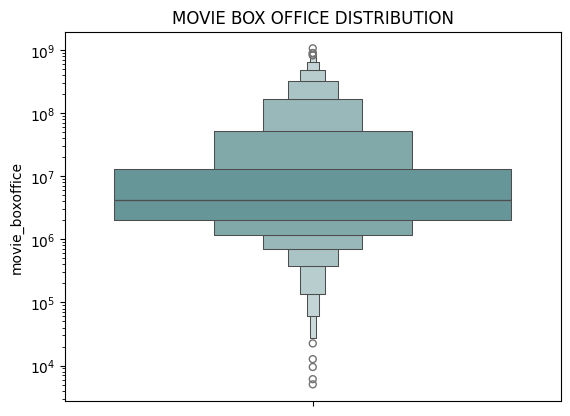

In [521]:
sns.boxenplot(dataframe.movie_boxoffice, color='cadetblue')
plt.title("MOVIE BOX OFFICE DISTRIBUTION")
plt.yscale('log')
plt.show()

In [522]:
nan = dataframe.movie_boxoffice.isna().sum()
print(f'Il y a {nan} films sans movie_boxoffice dans le dataset')

Il y a 2739 films sans movie_boxoffice dans le dataset


#### MOVIE BUDGET

In [523]:
# Attention, il y avait un problème de conversion des budgets non américains donc j'ai tout laissé tel quel
# Il faudrait peut-être les convertir via pandas & rescraper ces données en enlevant le nettoyage de cette variable dans les pipelines
# Supprimer les budgets inférieurs à un certain seuil?

In [524]:
dataframe.movie_budget.describe()

count    5.380000e+02
mean     3.225197e+07
std      4.768184e+07
min      3.700000e+05
25%      6.155000e+06
50%      1.121629e+07
75%      3.500000e+07
max      2.910000e+08
Name: movie_budget, dtype: float64

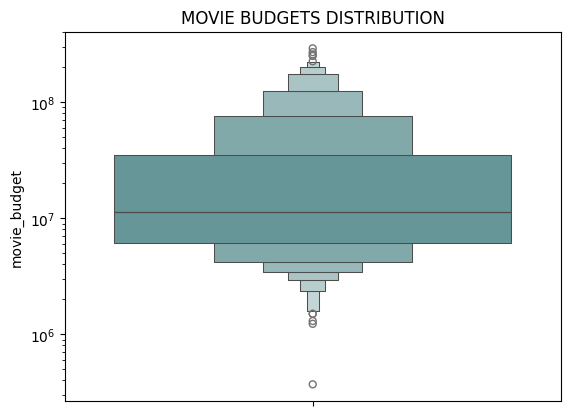

In [525]:
sns.boxenplot(dataframe.movie_budget, color='cadetblue')
plt.title("MOVIE BUDGETS DISTRIBUTION")
plt.yscale('log')
plt.show()

In [526]:
nan = dataframe.movie_budget.isna().sum()
print(f'Il y a {nan} films sans movie_budget dans le dataset')

Il y a 3382 films sans movie_budget dans le dataset


#### MOVIE CAST

In [527]:
# Que faire?

In [528]:
dataframe.movie_cast.describe()

count                                                  1218
unique                                                 1117
top       Pierre-François Martin-Laval|Julie Depardieu|P...
freq                                                      3
Name: movie_cast, dtype: object

In [529]:
dataframe.casting.describe()

count                                                  3920
unique                                                 3788
top       Grégoire Ludig|David Marsais|Adèle Exarchopoul...
freq                                                      4
Name: casting, dtype: object

In [530]:
nan = dataframe.movie_cast.isna().sum()
print(f'Il y a {nan} films sans movie_cast dans le dataset')

Il y a 2702 films sans movie_cast dans le dataset


In [531]:
nan = dataframe.casting.isna().sum()
print(f'Il y a {nan} films sans casting dans le dataset')

Il y a 0 films sans casting dans le dataset


#### MOVIE CATEGORIES

In [532]:
# Que faire?

In [533]:
dataframe.genres.describe()

count        3918
unique        405
top       Comédie
freq          633
Name: genres, dtype: object

In [534]:
merge.movie_categories.describe()

count      6127
unique      394
top       Drame
freq       1555
Name: movie_categories, dtype: object

In [535]:
nan = dataframe.casting.isna().sum()
print(f'Il y a {nan} films sans catégories dans le dataset')

Il y a 0 films sans catégories dans le dataset


In [536]:
nan = dataframe.movie_categories.isna().sum()
print(f'Il y a {nan} films sans movie_categories dans le dataset')

Il y a 2702 films sans movie_categories dans le dataset


#### MOVIE COUNTRIES

In [537]:
dataframe.movie_countries.describe()

count       1218
unique       167
top       France
freq         659
Name: movie_countries, dtype: object

In [538]:
nan = dataframe.movie_countries.isna().sum()
print(f'Il y a {nan} films sans movie_countries dans le dataset')

Il y a 2702 films sans movie_countries dans le dataset


#### MOVIE DIRECTORS

In [539]:
nan = dataframe.movie_director.isna().sum()
print(f'Il y a {nan} films sans movie_director dans le dataset')

Il y a 0 films sans movie_director dans le dataset


In [540]:
dataframe.movie_director.describe()

count            3920
unique           1814
top       Woody Allen
freq               18
Name: movie_director, dtype: object

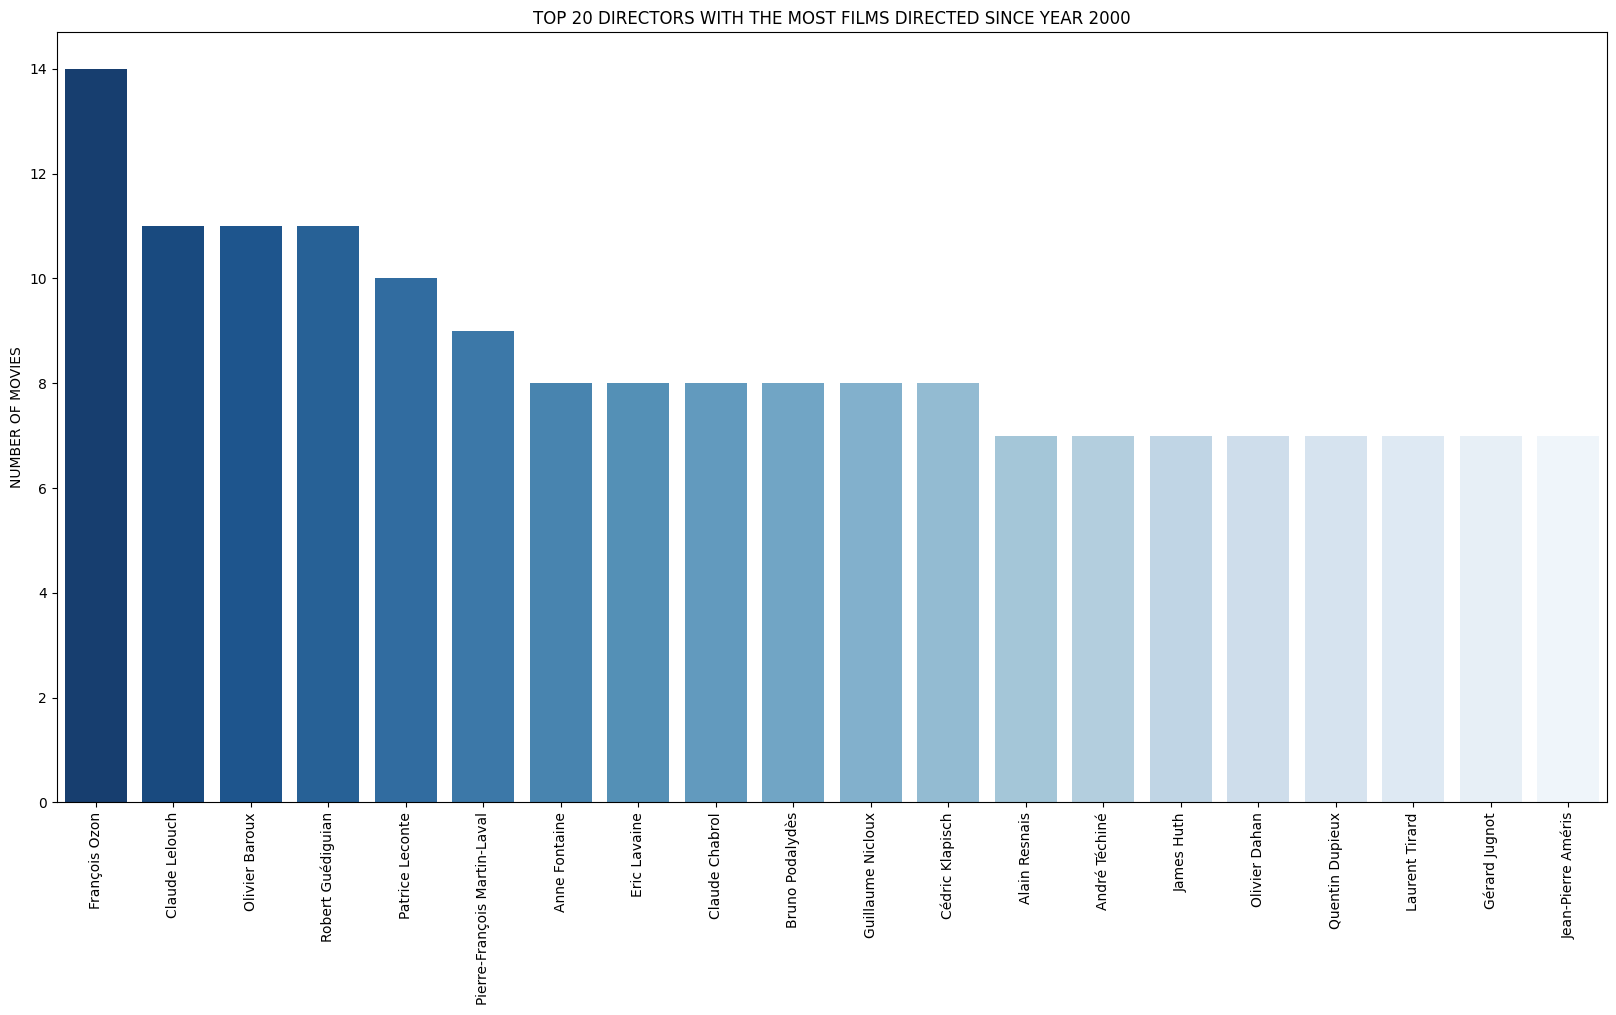

In [541]:
test = dataframe.groupby("movie_director").count().reset_index()
test = test.rename(columns={"movie_boxoffice": "Total"})
test_top = test.sort_values(by="Total", ascending=False).head(20)
test_top = test_top[["movie_director", "Total"]]
plt.figure(figsize=(20,10))
plt.title("TOP 20 DIRECTORS WITH THE MOST FILMS DIRECTED SINCE YEAR 2000")
sns.barplot(test_top, x='movie_director', y="Total", hue="movie_director", palette="Blues_r", legend=False)
plt.xticks(rotation='vertical')
plt.ylabel('NUMBER OF MOVIES')
plt.xlabel('')
plt.show()

#### MOVIE ID

In [542]:
# Que faire?

In [543]:
nan = dataframe.movie_id.isna().sum()
print(f'Il y a {nan} films sans movie_id dans le dataset')

Il y a 2702 films sans movie_id dans le dataset


#### MOVIE METASCORE & PRESS RATINGS & VIEWERS RATINGS

In [544]:
dataframe.movie_imdb_metascore.describe()

count    409.000000
mean      62.865526
std       14.178104
min       14.000000
25%       53.000000
50%       64.000000
75%       73.000000
max       95.000000
Name: movie_imdb_metascore, dtype: float64

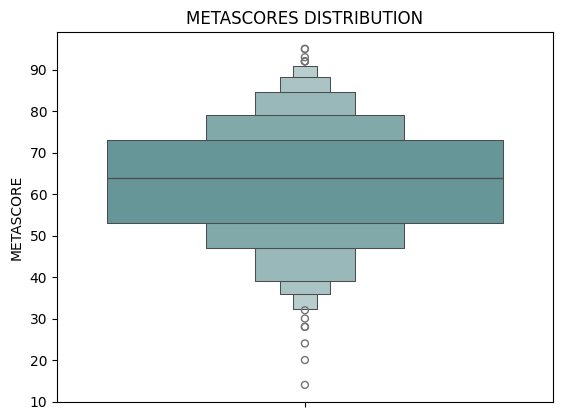

In [545]:
sns.boxenplot(dataframe.movie_imdb_metascore, color='cadetblue')
plt.title("METASCORES DISTRIBUTION")
plt.ylabel('METASCORE')
plt.show()

In [546]:
nan = dataframe.movie_imdb_metascore.isna().sum()
print(f'Il y a {nan} films sans movie_imdb_metascore dans le dataset')

Il y a 3511 films sans movie_imdb_metascore dans le dataset


In [547]:
dataframe.press_ratings.describe()

count    3920.000000
mean        3.072883
std         0.680462
min         1.000000
25%         2.600000
50%         3.100000
75%         3.600000
max         5.000000
Name: press_ratings, dtype: float64

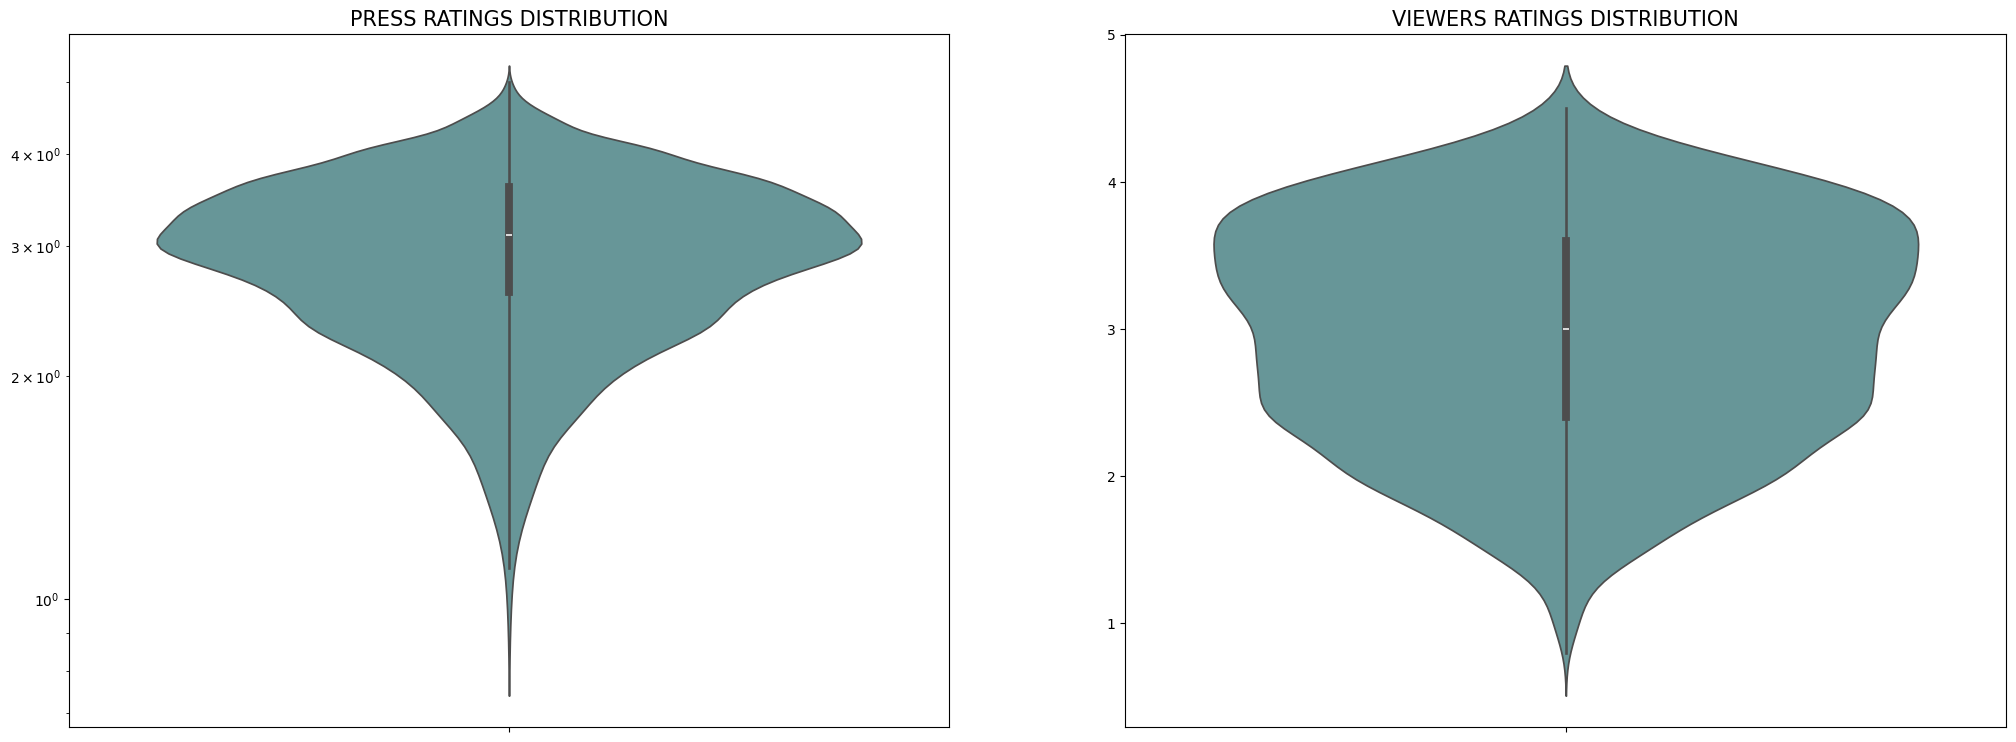

In [548]:
fig, axes = plt.subplots(1, 2, figsize=(25,9))
# Premier graphique
sns.violinplot(dataframe.press_ratings, color='cadetblue', ax=axes[0])
axes[0].set_yscale('log')
axes[0].set_ylabel('')
axes[0].set_title("PRESS RATINGS DISTRIBUTION", fontsize=15)
# Deuxième graphique
sns.violinplot(dataframe.viewers_ratings, color='cadetblue', ax=axes[1])
axes[1].set_ylabel('')
axes[1].set_title("VIEWERS RATINGS DISTRIBUTION", fontsize=15)
plt.show()

In [549]:
nan = dataframe.press_ratings.isna().sum()
print(f'Il y a {nan} films sans press_ratings dans le dataset')

Il y a 0 films sans press_ratings dans le dataset


In [550]:
dataframe.viewers_ratings.describe()

count    3902.000000
mean        2.984495
std         0.758233
min         0.800000
25%         2.400000
50%         3.000000
75%         3.600000
max         4.500000
Name: viewers_ratings, dtype: float64

In [551]:
nan = dataframe.viewers_ratings.isna().sum()
print(f'Il y a {nan} films sans viewers_ratings dans le dataset')

Il y a 18 films sans viewers_ratings dans le dataset


#### MOVIE NUMBER OF RATINGS METASCORE

In [552]:
dataframe.movie_imdb_nb_of_ratings.describe()

count    1.217000e+03
mean     8.805179e+04
std      9.112833e+05
min      1.400000e+01
25%      5.870000e+02
50%      1.400000e+04
75%      3.500000e+04
max      2.500000e+07
Name: movie_imdb_nb_of_ratings, dtype: float64

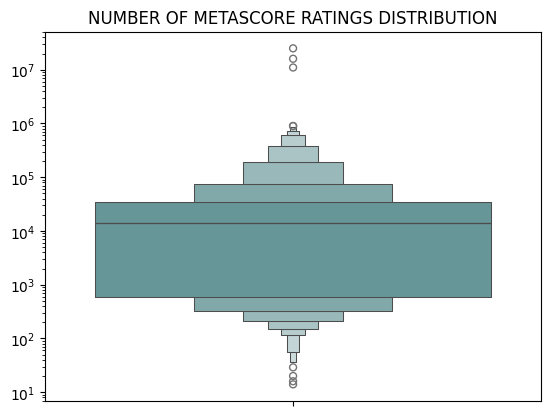

In [553]:
sns.boxenplot(dataframe.movie_imdb_nb_of_ratings, color='cadetblue')
plt.yscale('log')
plt.title('NUMBER OF METASCORE RATINGS DISTRIBUTION')
plt.ylabel('')
plt.show()

In [554]:
nan = dataframe.movie_imdb_nb_of_ratings.isna().sum()
print(f'Il y a {nan} films sans movie_imdb_nb_of_ratings dans le dataset')

Il y a 2703 films sans movie_imdb_nb_of_ratings dans le dataset


#### MOVIE IMDB POPULARITY

In [555]:
dataframe.movie_imdb_popularity.describe()

count     146.000000
mean     1885.178082
std      1323.475131
min         5.000000
25%       827.500000
50%      1570.000000
75%      2764.750000
max      4887.000000
Name: movie_imdb_popularity, dtype: float64

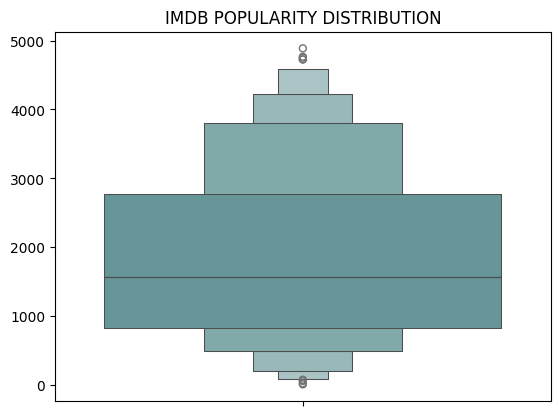

In [556]:
sns.boxenplot(dataframe.movie_imdb_popularity, color='cadetblue')
plt.ylabel("")
plt.title('IMDB POPULARITY DISTRIBUTION')
plt.show()

In [557]:
nan = dataframe.movie_imdb_popularity.isna().sum()
print(f'Il y a {nan} films sans movie_imdb_popularity dans le dataset')

Il y a 3774 films sans movie_imdb_popularity dans le dataset


#### MOVIE IMDB RATING

In [558]:
dataframe.movie_imdb_rating.describe()

count    1217.000000
mean        6.075103
std         0.898105
min         2.400000
25%         5.600000
50%         6.200000
75%         6.700000
max         8.800000
Name: movie_imdb_rating, dtype: float64

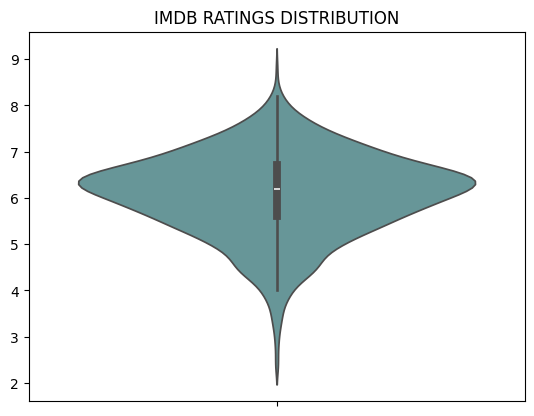

In [559]:
sns.violinplot(dataframe.movie_imdb_rating, color='cadetblue')
plt.title('IMDB RATINGS DISTRIBUTION')
plt.ylabel('')
plt.show()

In [560]:
nan = dataframe.movie_imdb_rating.isna().sum()
print(f'Il y a {nan} films sans movie_imdb_rating dans le dataset')

Il y a 2703 films sans movie_imdb_rating dans le dataset


#### MOVIE LENGTH

In [561]:
dataframe.movie_length.describe()

count    3910.000000
mean      106.892583
std        17.845324
min        66.000000
25%        94.000000
50%       103.000000
75%       117.000000
max       220.000000
Name: movie_length, dtype: float64

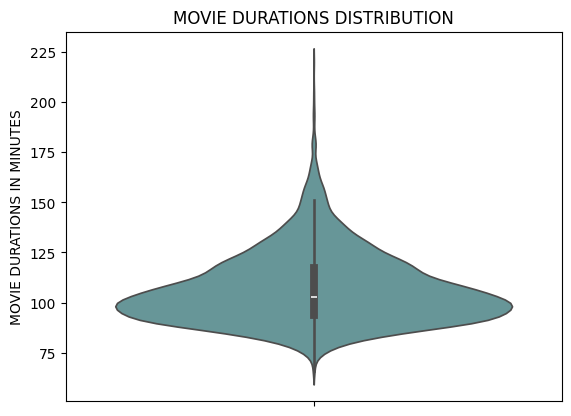

In [562]:
sns.violinplot(dataframe.movie_length, color='cadetblue')
plt.title('MOVIE DURATIONS DISTRIBUTION')
plt.ylabel('MOVIE DURATIONS IN MINUTES')
plt.show()

In [563]:
nan = dataframe.movie_length.isna().sum()
print(f'Il y a {nan} films sans movie_length dans le dataset')

Il y a 10 films sans movie_length dans le dataset


#### MOVIE ORIGINAL TITLE

In [564]:
# Que faire?

In [565]:
dataframe.movie_original_title.describe()

count                  231
unique                 212
top        The Equalizer 2
freq                     3
Name: movie_original_title, dtype: object

In [566]:
nan = dataframe.movie_original_title.isna().sum()
print(f'Il y a {nan} films sans movie_original_title dans le dataset')

Il y a 3689 films sans movie_original_title dans le dataset


#### MOVIE POSTER & IMG_SRC

In [567]:
# Que faire?

In [568]:
nan = dataframe.movie_poster.isna().sum()
print(f'Il y a {nan} films sans movie_poster dans le dataset')

Il y a 2702 films sans movie_poster dans le dataset


In [569]:
nan = dataframe.img_src.isna().sum()
print(f'Il y a {nan} films sans img_src dans le dataset')

Il y a 6 films sans img_src dans le dataset


#### MOVIE PRODUCTION COMPANIES

In [570]:
# Que faire?

In [571]:
dataframe.movie_production_companies.describe()

count                                           1218
unique                                          1041
top       Pan Européenne|StudioCanal|France 2 Cinéma
freq                                               7
Name: movie_production_companies, dtype: object

In [572]:
nan = dataframe.movie_production_companies.isna().sum()
print(f'Il y a {nan} films sans movie_production_companies dans le dataset')

Il y a 2702 films sans movie_production_companies dans le dataset


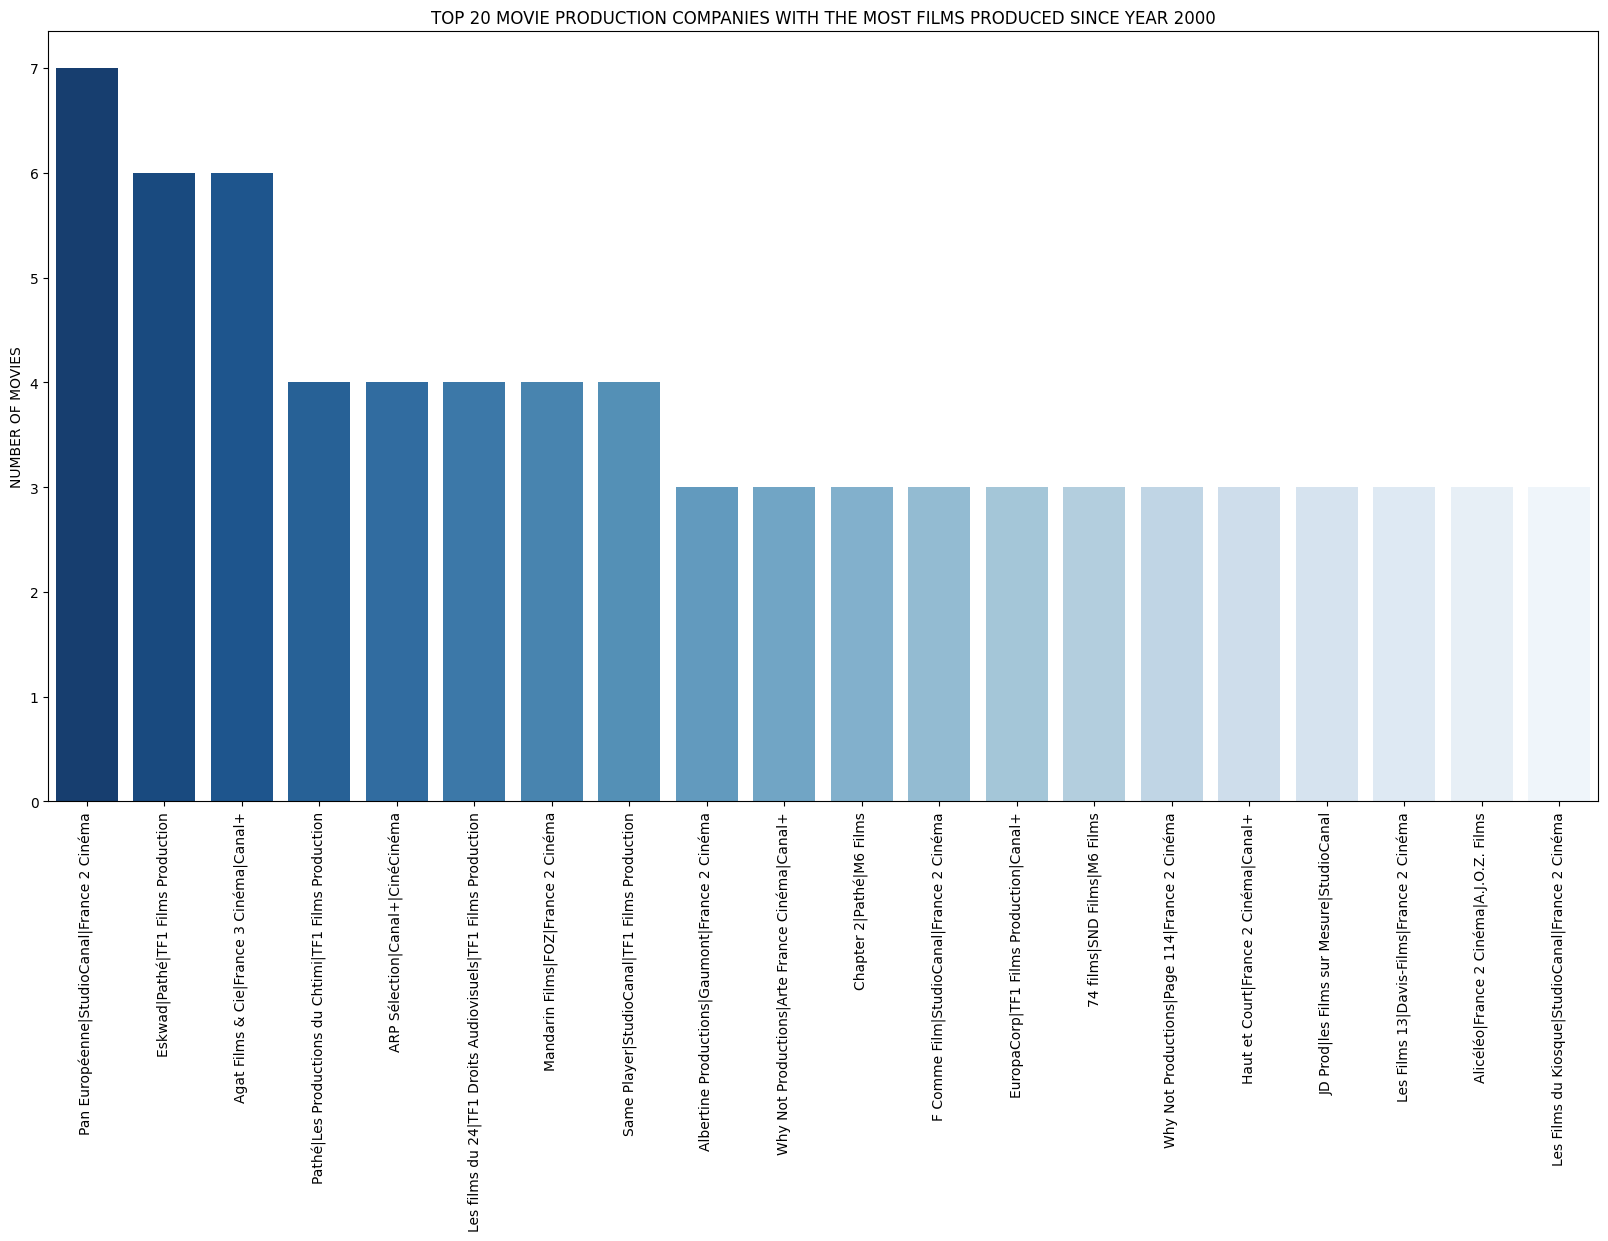

In [573]:
test = dataframe.groupby("movie_production_companies").count().reset_index()
test = test.rename(columns={"movie_boxoffice": "Total"})
test_top = test.sort_values(by="Total", ascending=False).head(20)
test_top = test_top[["movie_production_companies", "Total"]]
plt.figure(figsize=(20,10))
plt.title("TOP 20 MOVIE PRODUCTION COMPANIES WITH THE MOST FILMS PRODUCED SINCE YEAR 2000")
sns.barplot(test_top, x='movie_production_companies', y="Total", hue="movie_production_companies", palette="Blues_r", legend=False)
plt.xticks(rotation='vertical')
plt.ylabel('NUMBER OF MOVIES')
plt.xlabel('')
plt.show()

In [574]:
dataframe.societies.describe() 

count                                                  3919
unique                                                 3548
top       The Walt Disney Company France|Pixar Animation...
freq                                                      9
Name: societies, dtype: object

In [575]:
nan = dataframe.societies.isna().sum()
print(f'Il y a {nan} films sans societies dans le dataset')

Il y a 1 films sans societies dans le dataset


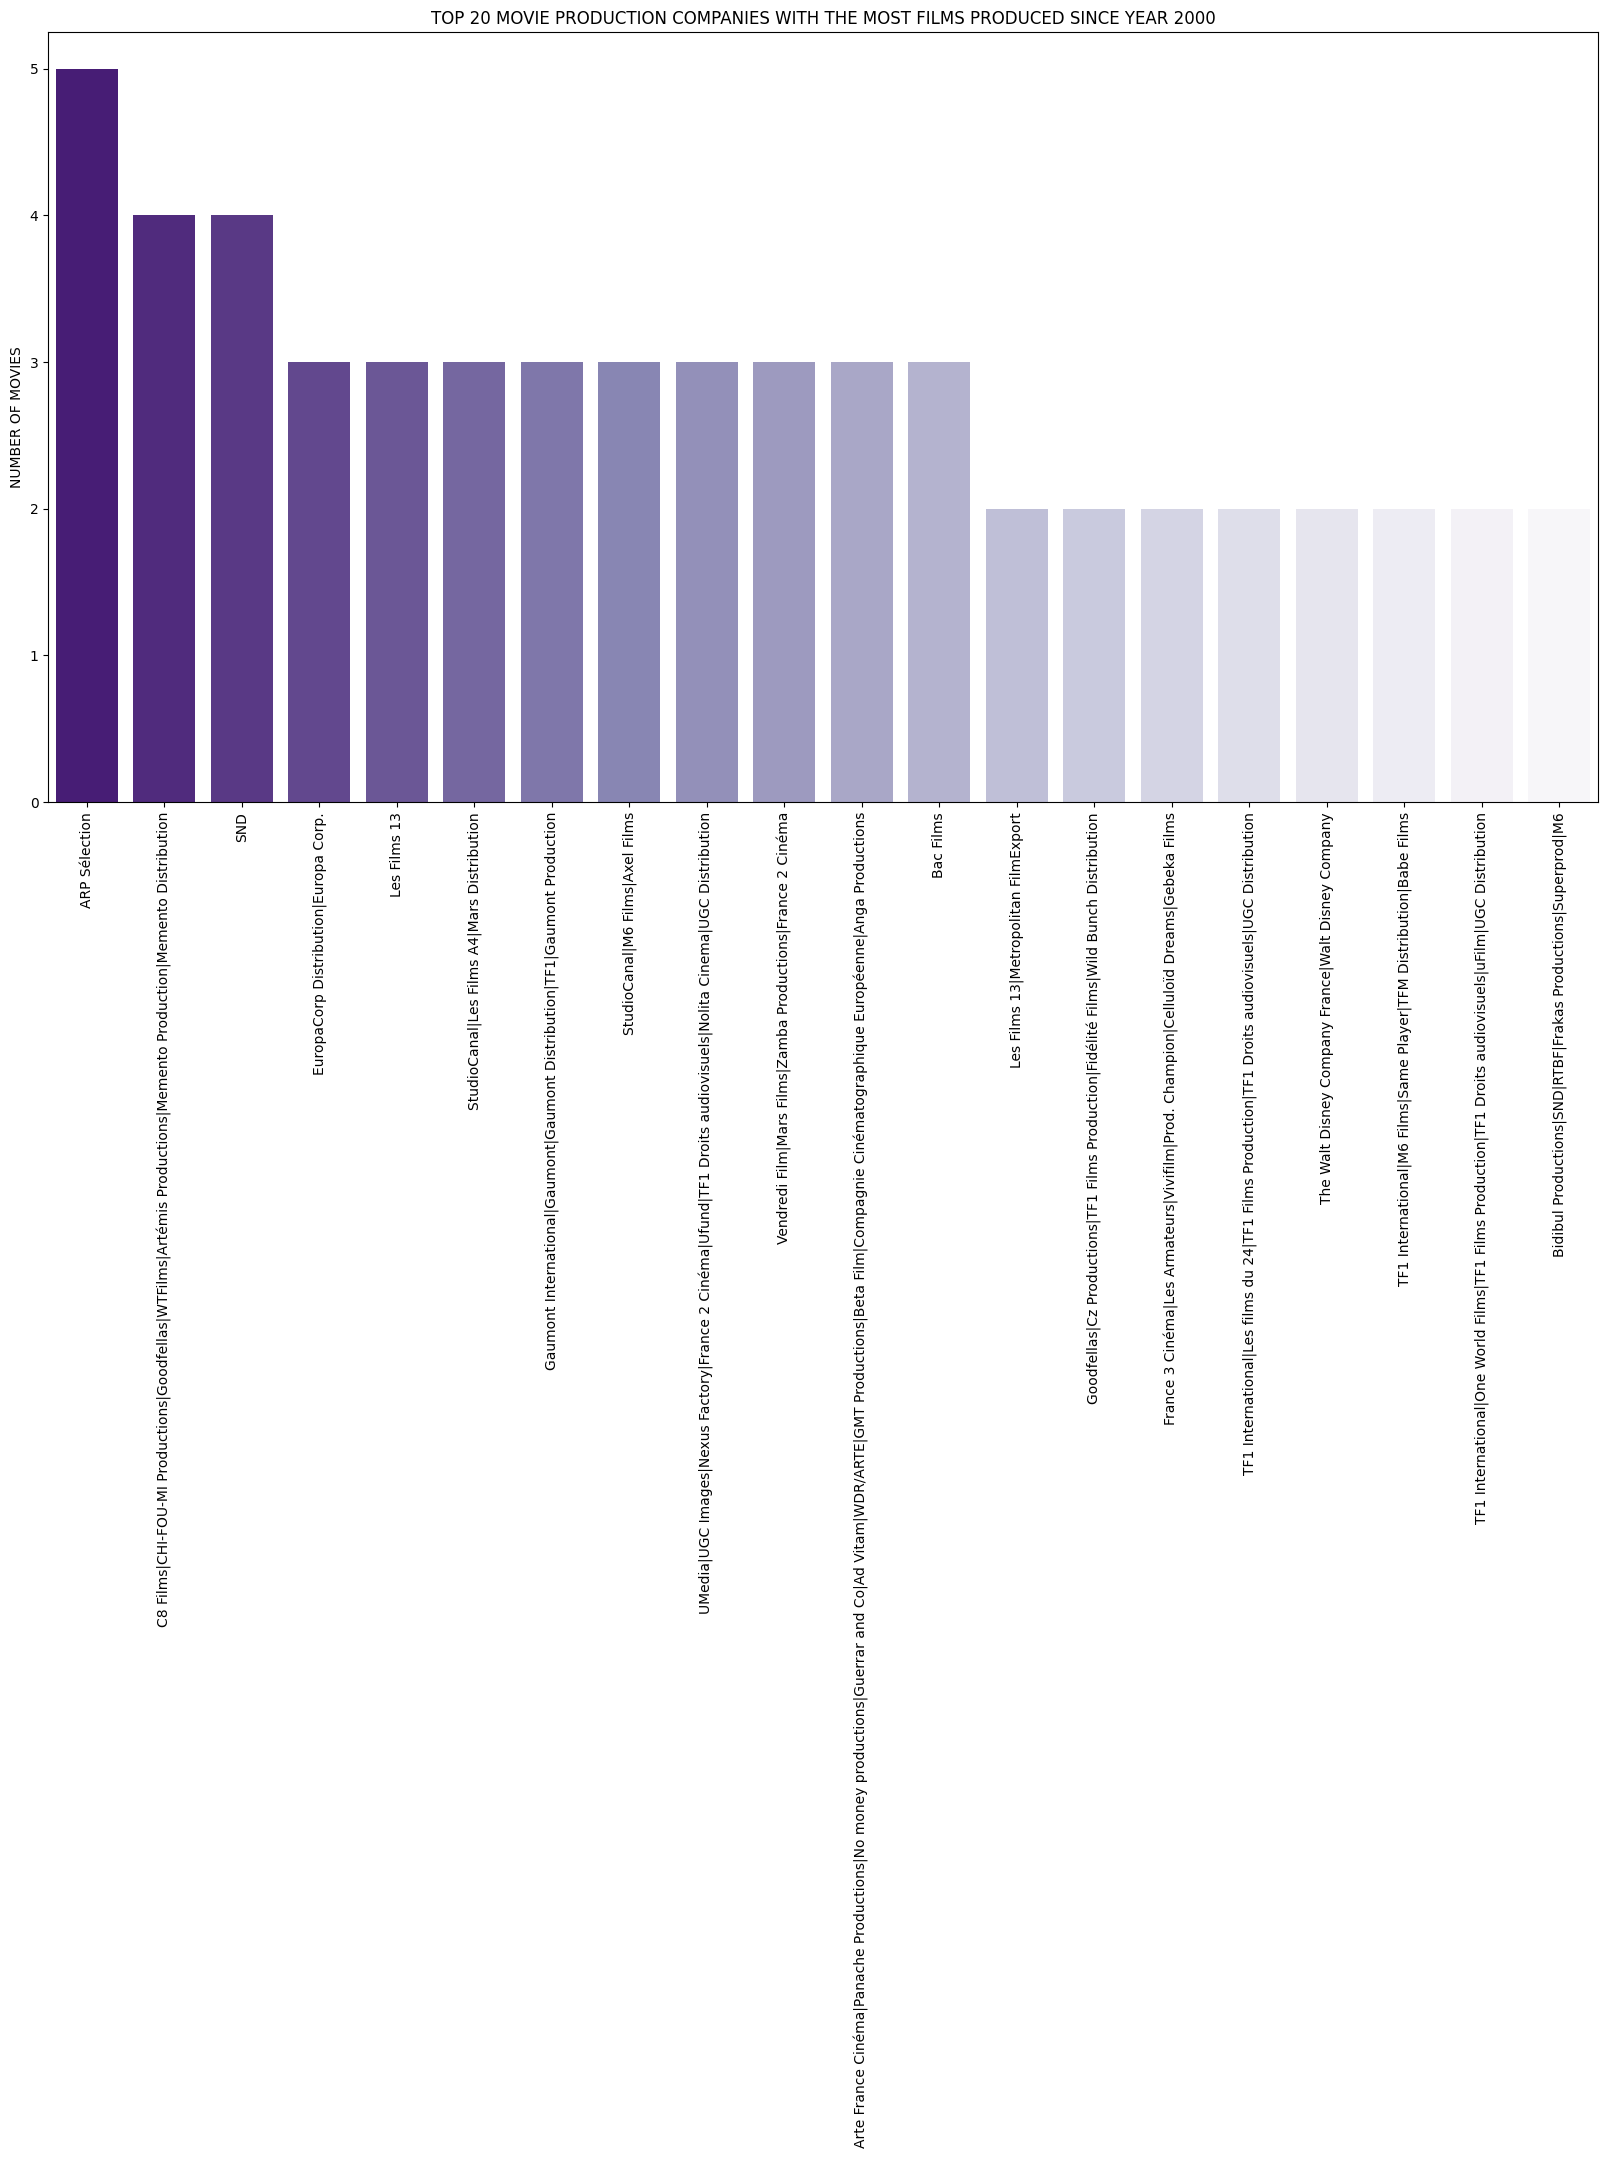

In [576]:
test = dataframe.groupby("societies").count().reset_index()
test = test.rename(columns={"movie_boxoffice": "Total"})
test_top = test.sort_values(by="Total", ascending=False).head(20)
test_top = test_top[["societies", "Total"]]
plt.figure(figsize=(20,10))
plt.title("TOP 20 MOVIE PRODUCTION COMPANIES WITH THE MOST FILMS PRODUCED SINCE YEAR 2000")
sns.barplot(test_top, x='societies', y="Total", hue="societies", palette="Purples_r", legend=False)
plt.xticks(rotation='vertical')
plt.ylabel('NUMBER OF MOVIES')
plt.xlabel('')
plt.show()

#### MOVIE SYNOPSIS

In [577]:
# Que faire?

In [578]:
dataframe.movie_synopsis.describe()

count                                                  1206
unique                                                 1107
top       Trois frères et soeurs devenus adultes se réun...
freq                                                      3
Name: movie_synopsis, dtype: object

In [579]:
dataframe.synopsis.describe()

count                                                  3920
unique                                                 3784
top       Jean-Gab et Manu, deux amis simples d’esprit, ...
freq                                                      4
Name: synopsis, dtype: object

In [580]:
nan = dataframe.movie_synopsis.isna().sum()
print(f'Il y a {nan} films sans movie_synopsis dans le dataset')

Il y a 2714 films sans movie_synopsis dans le dataset


In [581]:
nan = dataframe.synopsis.isna().sum()
print(f'Il y a {nan} films sans synopsis dans le dataset')

Il y a 0 films sans synopsis dans le dataset


#### MOVIE TITLE

In [582]:
# Que faire?

In [583]:
dataframe.movie_title_x.describe()

count           3920
unique          3771
top       Mandibules
freq               4
Name: movie_title_x, dtype: object

In [584]:
dataframe.movie_title_y.describe()

count           1218
unique          1117
top       Essaye-Moi
freq               3
Name: movie_title_y, dtype: object

In [585]:
nan = dataframe.movie_title_x.isna().sum()
print(f'Il y a {nan} films sans movie_title dans le dataset')

Il y a 0 films sans movie_title dans le dataset


In [586]:
nan = dataframe.movie_title_y.isna().sum()
print(f'Il y a {nan} films sans movie_title dans le dataset')

Il y a 2702 films sans movie_title dans le dataset


#### MOVIE URL

In [587]:
merge.movie_url.describe()

count                                       6133
unique                                      6133
top       https://www.imdb.com/title/tt21942866/
freq                                           1
Name: movie_url, dtype: object

In [588]:
nan = merge.movie_url.isna().sum()
print(f'Il y a {nan} films sans movie_url dans le dataset')

Il y a 0 films sans movie_url dans le dataset


#### MOVIE US BOXOFFICE

In [589]:
# THIS COLUMN WILL BE DROPPED

In [590]:
nan = dataframe.movie_us_boxoffice.isna().sum()
print(f'Il y a {nan} films sans movie_us_boxoffice dans le dataset')

Il y a 3537 films sans movie_us_boxoffice dans le dataset


#### MOVIE RELEASE DATE

In [591]:
# PB !!
# Ici, on voit bien qu'il y a bien des films de cette année présents dans le dataset.
# Plus bas, quand je demande la valeur maximale, c'est l'année 2021 (et non 2024 ou 2025) qui m'est retournée. Pourquoi?

In [592]:
dataframe.release_date.describe()

count           1218
unique           803
top       18-01-2023
freq               6
Name: release_date, dtype: object

In [593]:
dataframe.release.describe()

count             3920
unique            1257
top       11 juin 2003
freq                 8
Name: release, dtype: object

In [596]:
dataframe.release.min()

'1 août 2001'

In [598]:
dataframe.release.max()

'9 septembre 2020'

In [599]:
nan = dataframe.release_date.isna().sum()
print(f'Il y a {nan} films sans release_date dans le dataset')

Il y a 2702 films sans release_date dans le dataset


In [600]:
nan = dataframe.release.isna().sum()
print(f'Il y a {nan} films sans release dans le dataset')

Il y a 0 films sans release dans le dataset


#### MOVIE YEAR

In [601]:
# La valeur minimale est 0 car j'ai rempli les NaN au tout début de l'EDA

In [602]:
dataframe.year.describe()

count    1217.000000
mean     2012.244043
std         6.637372
min      2000.000000
25%      2007.000000
50%      2012.000000
75%      2018.000000
max      2024.000000
Name: year, dtype: float64

In [603]:
nan = dataframe.year.isna().sum()
print(f'Il y a {nan} films sans movie_year dans le dataset')

Il y a 2703 films sans movie_year dans le dataset


#### TARGET : WEEK 1 FRENCH BOX-OFFICE/ENTRIES

In [604]:
dataframe.total_tickets_sold_on_week1.describe()

count         463
unique        420
top       193 463
freq            3
Name: total_tickets_sold_on_week1, dtype: object

In [605]:
nan_target = dataframe.total_tickets_sold_on_week1.isna().sum()
print(f'Il y a {nan_target} films sans Target dans le dataset')

Il y a 3457 films sans Target dans le dataset


In [606]:
nan_target = dataframe.entries.isna().sum()
print(f'Il y a {nan_target} films sans Target dans le dataset')

Il y a 0 films sans Target dans le dataset


In [607]:
dataframe.entries.describe() 

count    3.920000e+03
mean     3.431092e+05
std      4.117484e+05
min      7.600000e+01
25%      1.210938e+05
50%      2.011470e+05
75%      3.822995e+05
max      3.906694e+06
Name: entries, dtype: float64

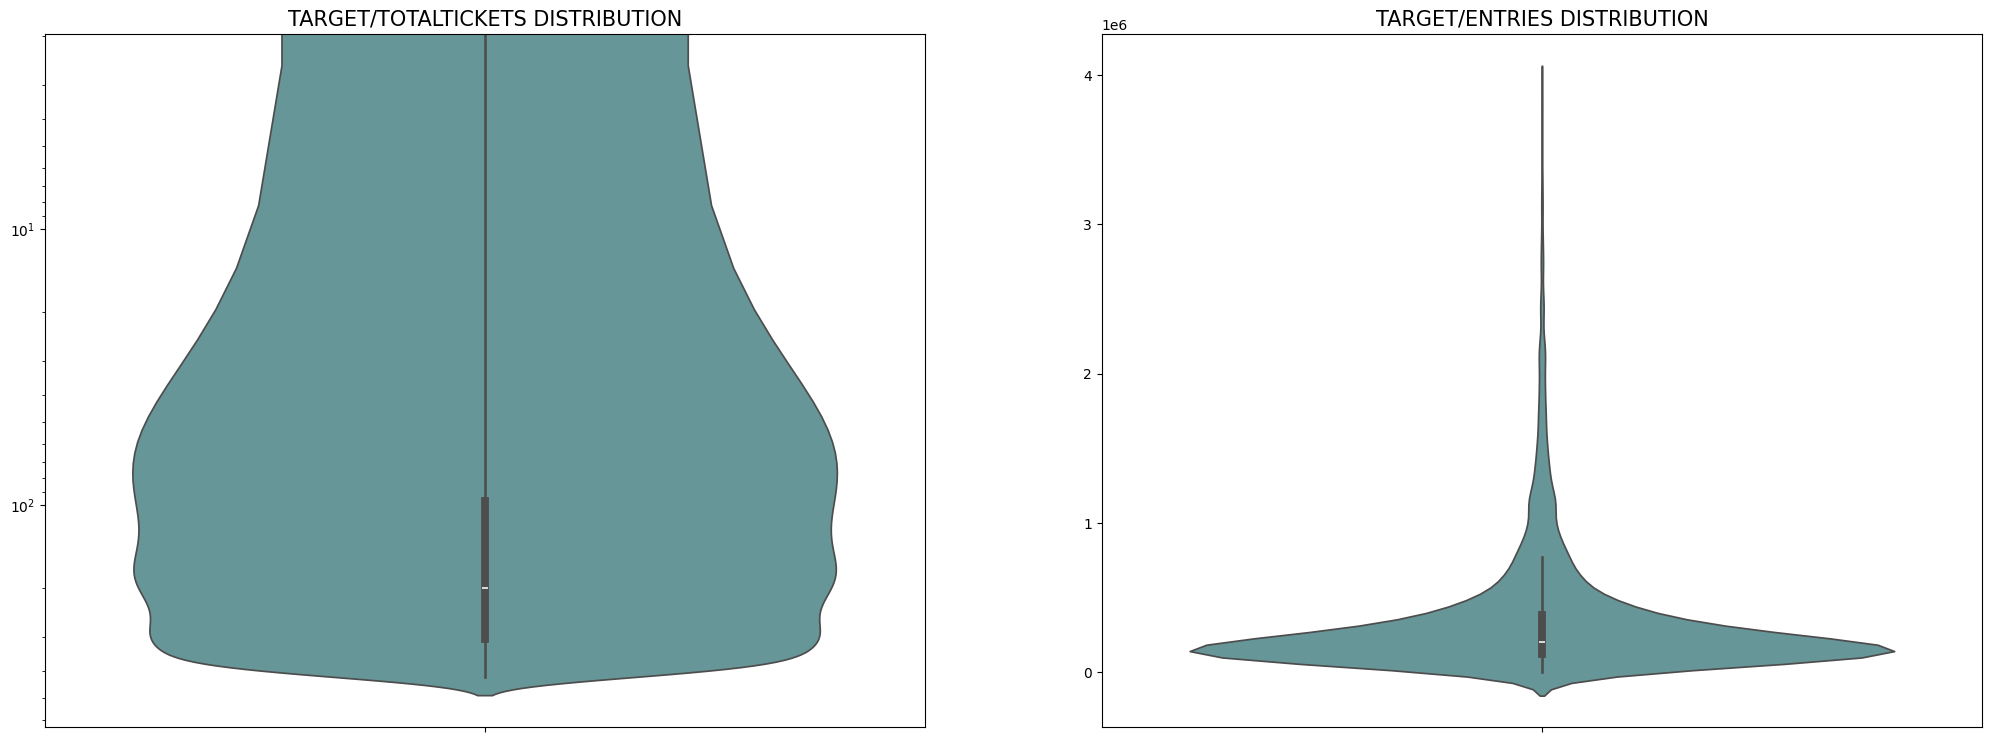

In [609]:
fig, axes = plt.subplots(1, 2, figsize=(25,9))
# Premier graphique
sns.violinplot(dataframe.total_tickets_sold_on_week1, color='cadetblue', ax=axes[0])
axes[0].set_ylabel('')
axes[0].set_yscale('log')
axes[0].set_title("TARGET/TOTALTICKETS DISTRIBUTION", fontsize=15)
# Deuxième graphique
sns.violinplot(dataframe.entries, color='cadetblue', ax=axes[1])
axes[1].set_ylabel('')
axes[1].set_title("TARGET/ENTRIES DISTRIBUTION", fontsize=15)
plt.show()

## Bivariate Analysis